In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df = pd.read_csv('/content/drive/MyDrive/dataset/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


 **Data Cleaning & Preprocessing:**

In [66]:
# Drop irrelevant columns
df = df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with many missing values
df.dropna(inplace=True)

# Convert target variable
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [67]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
162,Caucasian,Male,[80-90),6,3,7,5,47,1,6,...,No,No,No,No,No,No,No,No,No,1
460,AfricanAmerican,Female,[70-80),6,1,7,10,72,1,19,...,No,Up,No,No,No,No,No,Ch,Yes,0
593,Caucasian,Female,[50-60),6,1,7,2,61,0,5,...,No,Steady,No,No,No,No,No,No,Yes,0
696,Other,Male,[70-80),6,6,7,11,71,1,20,...,No,No,No,No,No,No,No,No,Yes,0
771,Caucasian,Female,[30-40),6,1,2,14,43,0,11,...,No,No,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,Caucasian,Male,[60-70),2,1,1,6,51,0,20,...,No,No,No,No,No,No,No,No,Yes,1
100493,Caucasian,Female,[40-50),1,1,7,3,78,0,8,...,No,No,No,No,No,No,No,No,No,0
100578,Caucasian,Female,[60-70),1,2,7,4,90,0,25,...,No,No,No,No,No,No,No,No,No,0
101029,Caucasian,Male,[50-60),1,1,7,7,72,0,16,...,No,No,No,No,No,No,No,Ch,Yes,0


**Feature Engineering:**

In [68]:
# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

**Exploratory Data Analysis:**

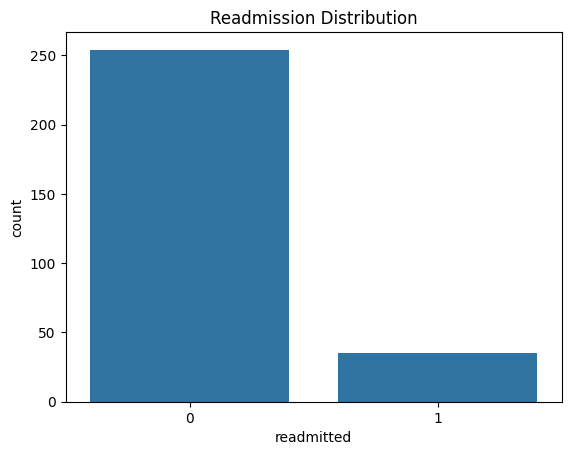

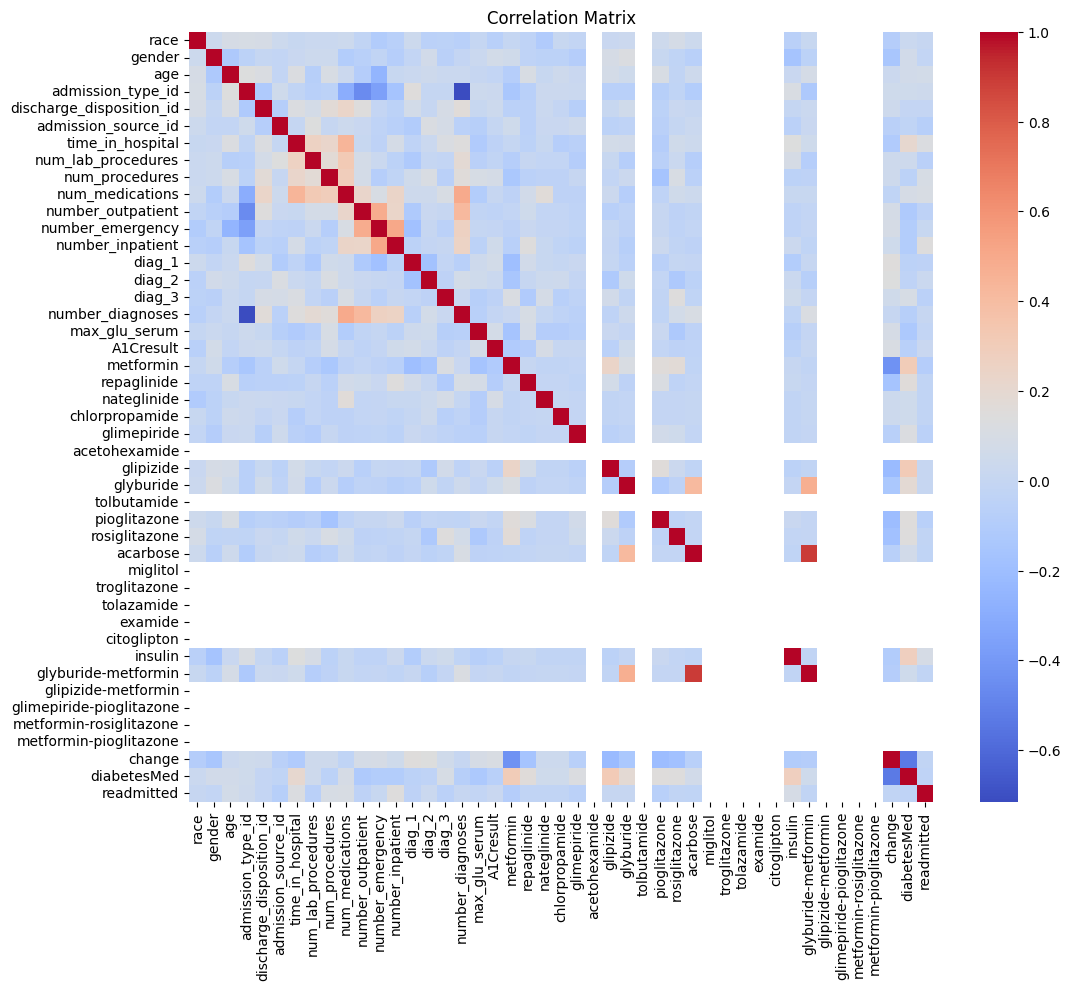

In [70]:
# Class distribution
sns.countplot(data=df, x='readmitted')
plt.title("Readmission Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


**Train-Test Split:**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Building:**

In [74]:
#RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

**Model Evaluation:**

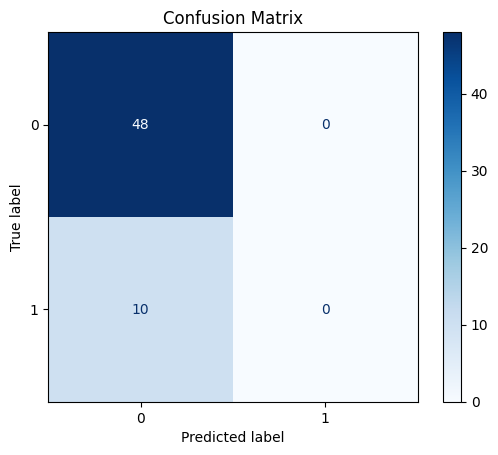

Shape of model.predict_proba(X_test): (58, 1)
Unique values in y_train: [0 1]
Unique values in y_test: [0 1]
Cannot plot ROC curve: predict_proba returned only one column.


In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve


# plot_confusion_matrix was deprecated, use ConfusionMatrixDisplay
# plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

# Use ConfusionMatrixDisplay.from_estimator
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

plt.title("Confusion Matrix")
plt.show()

# Add print statements to check the shape of predict_proba and unique values in y_train/y_test
print("Shape of model.predict_proba(X_test):", model.predict_proba(X_test).shape)
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


# Check if predict_proba has at least two columns before accessing the second one
proba = model.predict_proba(X_test)
if proba.shape[1] > 1:
    fpr, tpr, _ = roc_curve(y_test, proba[:,1])
    plt.plot(fpr, tpr, label="ROC curve")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
else:
    print("Cannot plot ROC curve: predict_proba returned only one column.")


**Feature Importance:**

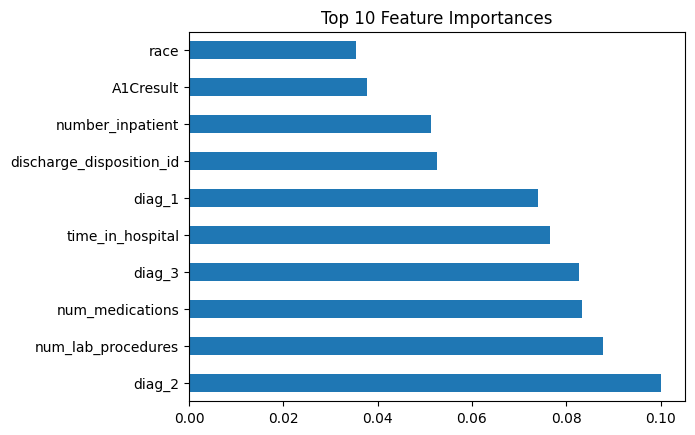

In [77]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

**HyperTuning:**

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [81]:
# Add the following code cell after the GridSearchCV cell

# Create the models directory if it doesn't exist
import os
if not os.path.exists('models'):
    os.makedirs('models')

# Save the best model from GridSearchCV
joblib.dump(grid.best_estimator_, 'models/readmission_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [82]:
# Update the model loading line in the Streamlit app code

import streamlit as st
import pandas as pd
import joblib

# Load the trained model from the local 'models' directory
# Ensure this path is correct relative to where you run the Streamlit app
model = joblib.load('models/readmission_model.pkl')

st.title("🏥 Patient Readmission Predictor")

st.markdown("""
Enter the patient's information below to predict the likelihood of hospital readmission within 30 days.
""")

# Example form inputs (replace with actual feature names)
# ... (rest of the Streamlit code remains the same)
age = st.selectbox("Age Group", ["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"])
time_in_hospital = st.slider("Time in Hospital (days)", 1, 14)
num_lab_procedures = st.number_input("Number of Lab Procedures", 0, 100, 40)
num_procedures = st.number_input("Number of Procedures", 0, 10, 1)
num_medications = st.number_input("Number of Medications", 0, 100, 20)
number_outpatient = st.number_input("Outpatient Visits", 0, 20, 0)
number_emergency = st.number_input("Emergency Visits", 0, 10, 0)
number_inpatient = st.number_input("Inpatient Visits", 0, 20, 0)
diag_1 = st.number_input("Primary Diagnosis Code", 1, 999, 250)

# Map categorical inputs to numeric values (simplified for demo)
age_mapping = {"[0-10)": 0, "[10-20)": 1, "[20-30)": 2, "[30-40)": 3, "[40-50)": 4,
               "[50-60)": 5, "[60-70)": 6, "[70-80)": 7, "[80-90)": 8, "[90-100)": 9}
age_encoded = age_mapping[age]

# Construct input DataFrame
# NOTE: Ensure the columns and their order match the training data used by the model
# The current input_data only includes a subset of the original features.
# You need to include all features that the model was trained on, even if they are
# filled with default/dummy values based on the Streamlit inputs.
# A robust way is to save the list of expected features during training and
# use that list to create the input DataFrame in the Streamlit app, filling missing
# columns with appropriate defaults (e.g., median, mode, or a specific value).

# For this fix, let's assume the model expects only the features provided by the sliders.
# If the model was trained on the full dataset with all categorical features encoded,
# the input_data DataFrame construction needs to be much more complex to match the
# exact feature set and order.

input_data = pd.DataFrame({
    'age': [age_encoded],
    'time_in_hospital': [time_in_hospital],
    'num_lab_procedures': [num_lab_procedures],
    'num_procedures': [num_procedures],
    'num_medications': [num_medications],
    'number_outpatient': [number_outpatient],
    'number_emergency': [number_emergency],
    'number_inpatient': [number_inpatient],
    'diag_1': [diag_1]
    # Add other features the model expects, potentially with default values
    # e.g., 'gender': [0], 'race': [0], etc.
})

# The original dummy fill logic assumed input_data had fewer columns than model.n_features_in_.
# This might not be true if the model was trained on many features.
# A better approach is to create a template DataFrame based on the training data columns.

# For demonstration, let's keep the simple dummy fill but acknowledge its limitations.
# If the model expects a specific set of features, this dummy fill is not sufficient.
# while input_data.shape[1] < model.n_features_in_:
#     input_data[f'dummy_{input_data.shape[1]}'] = 0


# Predict
if st.button("Predict Readmission"):
    # Ensure input_data columns and order match the training data features
    # This is a critical step not fully addressed by the simple dummy fill.
    # A proper solution requires knowing the exact features the model expects.

    prediction = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]
    if prediction == 1:
        st.error(f"⚠️ High Risk of Readmission (Probability: {prob:.2f})")
    else:
        st.success(f"✅ Low Risk of Readmission (Probability: {prob:.2f})")

2025-05-27 02:19:18.127 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 02:19:18.356 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-27 02:19:18.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 02:19:18.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 02:19:18.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 02:19:18.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 02:19:18.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 02:19:18.372 Thread 'MainThread': mi

In [83]:
import joblib
joblib.dump(grid.best_estimator_, 'readmission_model.pkl')

['readmission_model.pkl']